# Automating Business Loan Approval Using SQL

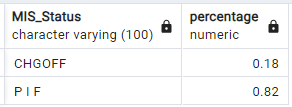


  ###                Time Series of Default Rates till 2020

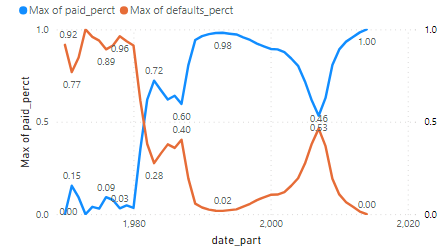

### Top 10 Customers


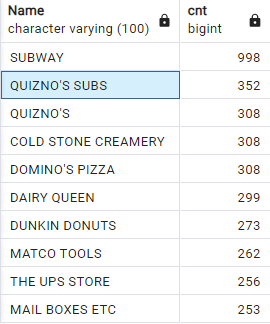

### Glimpse of Defualt rates by the top customers 



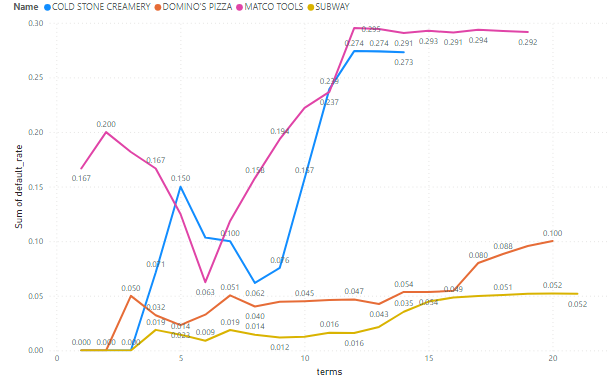

* Loans are given against Real Estate Property if the term of the loan is 20 years or more that is 240 months
  We have created a new column that would indicate if a loan was taken against industry property
  
* Additionally the lst two digits of NACIS indicate the industry secort we have extarcted the same from the column

`Note : Some of the DDL and DML commands used have been mentioned in the selected metrics pdf`

`Additionally more of these commands was used `

In this file we will only focus on creating a query that will help to focus out likely to default loans and best loan applications

Additionally this is just an human assumption with no focus on accuracy 

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [6]:
import pandas.io.sql as sqlio
import psycopg2 as ps

In [10]:
conn=ps.connect(dbname="mentormind",
                user="postgres",
                password="6282076096SQL",
                host="localhost",
                port="5432"
)

In [4]:
sql="""select * from sbanational """

In [5]:
df=sqlio.read_sql_query(sql,conn)
df

C:\Users\thoma\AppData\Local\Temp\ipykernel_4972\2615847269.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df=sqlio.read_sql_query(sql,conn)


,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv,industry_sector,real_estate
0,2900016006,UCK1 HOLDINGS LLC,IRVINE,CA,92620,UNITED PACIFIC BANK,CA,314999,2007-07-16,2007,...,None,2007-08-31,511000.0,0.0,P I F,0.0,511000.0,383250.0,"""Manufacturing""",0
1,2901494009,"STEPPING STONE, INC.",OMAHA,NE,68135,PREMIER BANK,NE,0,1999-04-21,1999,...,None,1999-05-31,315000.0,0.0,P I F,0.0,315000.0,236250.0,"""Unknown Category""",0
2,2905114008,D & D FILTER,ARVAD,CO,90002,FIRSTBANK,CO,0,1999-04-22,1999,...,None,1999-10-31,60000.0,0.0,P I F,0.0,60000.0,48000.0,"""Unknown Category""",0
3,2910894002,THE H M HUNTER CO.,CHARLOTTE,NC,28235,FIFTH THIRD BANK,OH,235940,1999-04-27,1999,...,None,2000-04-30,122235.0,0.0,P I F,0.0,122235.0,91676.0,"""Construction""",0
4,2912985005,Giovanni A/C,HOUSTON,TX,77089,BBCN BANK,CA,238210,2008-01-18,2008,...,None,2008-01-31,5000.0,0.0,P I F,0.0,5000.0,4250.0,"""Construction""",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899159,2841404001,TUCKER ENTERPRISES INC,COLUMBIA,MO,65201,REGIONS BANK,TN,448310,1999-03-18,1999,...,None,1999-06-30,165000.0,0.0,P I F,0.0,165000.0,123750.0,"""Retail trade""",0
899160,2856664001,PIZZA K,ATLANTA,GA,30318,REGIONS BANK,GA,0,1999-03-26,1999,...,None,1999-04-30,75000.0,0.0,P I F,0.0,75000.0,60000.0,"""Unknown Category""",0
899161,2859304004,AAA WHOLESALE,KENNER,LA,70062,IBERIABANK,LA,0,1999-03-29,1999,...,None,1999-05-31,75000.0,0.0,P I F,0.0,75000.0,60000.0,"""Unknown Category""",0
899162,2869396005,TRADE WIND LIQUOR,GARDENA,CA,90248,UNITI BANK,CA,445310,2007-06-26,2007,...,None,2007-07-31,332000.0,0.0,P I F,0.0,332000.0,249000.0,"""Retail trade""",0


In [6]:
print(df.columns)
default_filter=df['MIS_Status']=="CHGOFF"
default_df=df[default_filter]
paid_df=df[~default_filter]

pd.set_option('display.float_format', lambda x: '%.3f' %x)
default_df['DisbursementGross'].describe()


Index(['LoanNr_ChkDgt ', 'Name', 'City', 'State', 'Zip', 'Bank', 'BankState',
       'NAICS', 'ApprovalDate', 'ApprovalFY ', 'Term ', 'NoEmp', 'NewExist',
       'CreateJob', 'RetainedJob ', 'FranchiseCode ', 'UrbanRural',
       'RevLineCr ', 'LowDoc', 'ChgOffDate', 'DisbursementDate',
       'DisbursementGross', 'BalanceGross', 'MIS_Status', 'ChgOffPrinGr',
       'GrAppv', 'SBA_Appv', 'industry_sector', 'real_estate'],
      dtype='object')


count    157558.000
mean     132507.852
std      211778.893
min        4000.000
25%       27500.000
50%       61500.000
75%      140000.000
max     4362157.000
Name: DisbursementGross, dtype: float64

In [7]:
pd.set_option('display.float_format', lambda x: '%.3f' %x)
paid_quartiles=paid_df['DisbursementGross'].describe().to_frame().reset_index().rename(columns={'DisbursementGross':"paid"})
paid_quartiles

default_quartiles=default_df['DisbursementGross'].describe().to_frame().reset_index().rename(columns={'DisbursementGross':"Default"})
default_quartiles

quartiles=pd.merge(paid_quartiles,default_quartiles,on="index")
quartiles

,index,paid,Default
0,count,741606.000,157558.000
1,mean,215738.247,132507.852
2,std,299287.079,211778.893
3,min,0.000,4000.000
4,25%,48000.000,27500.000
5,50%,100000.000,61500.000
6,75%,255000.000,140000.000
7,max,11446325.000,4362157.000


# Industry Analysis

In [8]:
industry_deaults_query="""select "industry_sector",
avg(case when "MIS_Status"='CHGOFF' then 1 else 0 end) as default_rate
from sbanational
group by 1"""
industry_defaults_df=sqlio.read_sql_query(industry_deaults_query,conn)
industry_defaults_df.sort_values(by="default_rate",inplace=True)

C:\Users\thoma\AppData\Local\Temp\ipykernel_4972\2649641475.py:5: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  industry_defaults_df=sqlio.read_sql_query(industry_deaults_query,conn)


In [9]:
industry_defaults_df.head()

,industry_sector,default_rate
18,"""Unknown Category""",0.083
11,"""Mining, quarrying, and oil and gas extraction""",0.085
2,"""Agriculture, forestry, fishing and hunting""",0.090
9,"""Management of companies and enterprises""",0.101
7,"""Health care and social assistance""",0.104


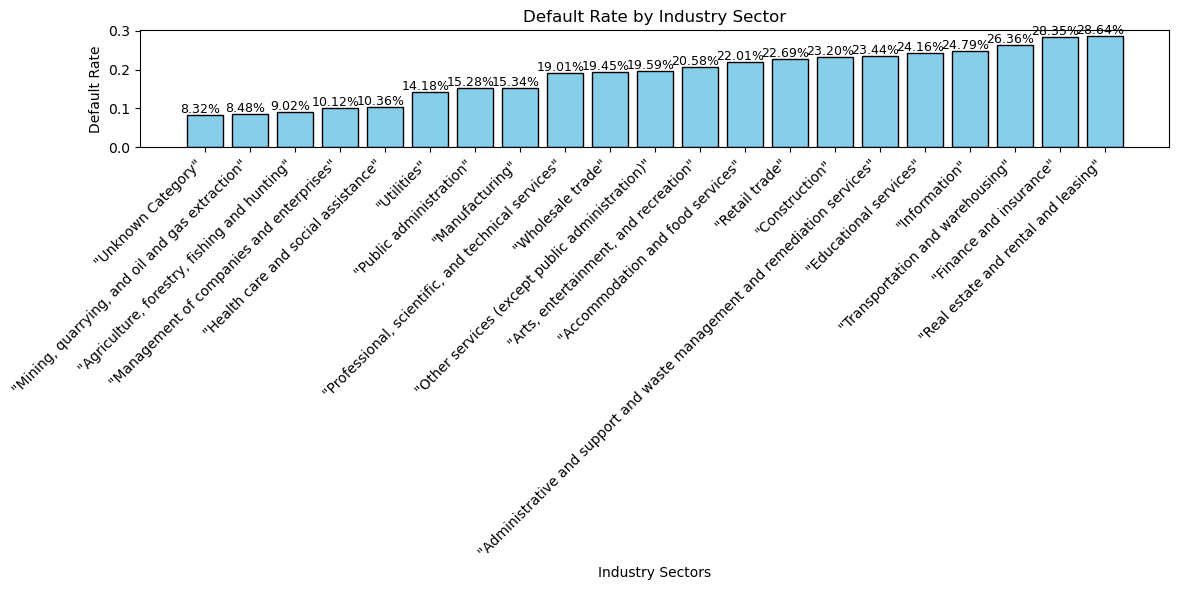

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))  # Adjust figure size for better visualization

# Create the bar plot with custom color and edge color
bars = plt.bar(industry_defaults_df['industry_sector'],
               industry_defaults_df['default_rate'],
               color='skyblue', edgecolor='black')

plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.xlabel('Industry Sectors')  # X-axis label
plt.ylabel('Default Rate')  # Y-axis label
plt.title('Default Rate by Industry Sector')  # Title of the plot

# Add data labels to the top of each bar
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1,  # Adjust text position
             bar.get_height() + 0.005,  # Adjust height
             f'{bar.get_height():.2%}',  # Display percentage with two decimal places
             ha='center', color='black', fontsize=9)

plt.tight_layout()  # Adjust layout for better fit
plt.show()


In [11]:
industry_defaults_cohort_query="""

select bb.industry_sector,
date_part('year',age(bb."ApprovalDate",aa.first_year)) as periods,
date_part('year',bb."ApprovalDate") as current_year,
count(distinct bb."LoanNr_ChkDgt ") as total_loans ,
AVG(case when "MIS_Status"='CHGOFF' THEN 1 ELSE 0 END) AS default_rate
from
(
select "industry_sector",min("ApprovalDate") as first_year
from sbanational
group by 1
)aa
join sbanational bb on aa."industry_sector"=bb."industry_sector" 
group by 1,2,3
"""
industry_cohort=sqlio.read_sql_query(industry_defaults_cohort_query,conn)

C:\Users\thoma\AppData\Local\Temp\ipykernel_4972\3209180244.py:17: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  industry_cohort=sqlio.read_sql_query(industry_defaults_cohort_query,conn)


In [12]:
industry_cohort.head()

,industry_sector,periods,current_year,total_loans,default_rate
0,"""Accommodation and food services""",0.000,1987.000,12,0.583
1,"""Accommodation and food services""",1.000,1988.000,20,0.250
2,"""Accommodation and food services""",1.000,1989.000,3,0.000
3,"""Accommodation and food services""",2.000,1989.000,87,0.092
4,"""Accommodation and food services""",3.000,1990.000,82,0.049


In [13]:
industry_cohort.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1097 entries, 0 to 1096
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   industry_sector  1097 non-null   object 
 1   periods          1097 non-null   float64
 2   current_year     1097 non-null   float64
 3   total_loans      1097 non-null   int64  
 4   default_rate     1097 non-null   float64
dtypes: float64(3), int64(1), object(1)
memory usage: 43.0+ KB


In [16]:
df.columns

Index(['LoanNr_ChkDgt ', 'Name', 'City', 'State', 'Zip', 'Bank', 'BankState',
       'NAICS', 'ApprovalDate', 'ApprovalFY ', 'Term ', 'NoEmp', 'NewExist',
       'CreateJob', 'RetainedJob ', 'FranchiseCode ', 'UrbanRural',
       'RevLineCr ', 'LowDoc', 'ChgOffDate', 'DisbursementDate',
       'DisbursementGross', 'BalanceGross', 'MIS_Status', 'ChgOffPrinGr',
       'GrAppv', 'SBA_Appv', 'industry_sector', 'real_estate'],
      dtype='object')

In [17]:
paid_quartiles=paid_df['SBA_Appv'].describe().to_frame().reset_index().rename(columns={'SBA_Appv':"paid"})
paid_quartiles

default_quartiles=default_df['SBA_Appv'].describe().to_frame().reset_index().rename(columns={'SBA_Appv':"Default"})
default_quartiles

newjob_quartiles=pd.merge(paid_quartiles,default_quartiles,on="index")
newjob_quartiles

,index,paid,Default
0,count,741606.000,157558.000
1,mean,163338.625,84299.319
2,std,238691.436,156288.280
3,min,100.000,500.000
4,25%,25000.000,12500.000
5,50%,75000.000,25000.000
6,75%,195000.000,80000.000
7,max,5472000.000,3411950.000


In [18]:
bank_query="""
select "BankState",
avg(case when "MIS_Status"='CHGOFF' THEN 1 ELSE 0 END) as default_rate,COUNT(1)
FROM SBANATIONAL
GROUP BY 1
having COUNT(1) > 10
ORDER BY 2 DESC
"""
bank_df=sqlio.read_sql_query(bank_query,conn)
bank_df.head()


C:\Users\thoma\AppData\Local\Temp\ipykernel_4972\1597199830.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  bank_df=sqlio.read_sql_query(bank_query,conn)


,BankState,default_rate,count
0,VA,0.382,29002
1,NC,0.293,79514
2,DE,0.254,24537
3,IL,0.223,65908
4,CA,0.220,118116


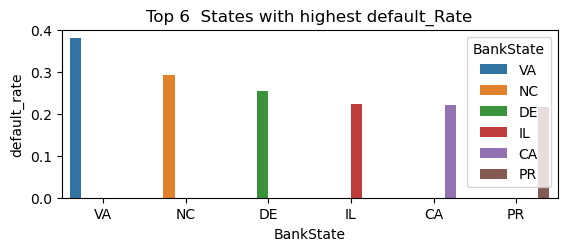

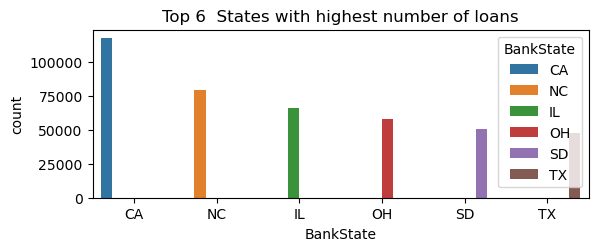

In [27]:
#Top 6 States with highest Default rates
import seaborn as sn



plt.subplot(2,1,1)
plt.title("Top 6  States with highest default_Rate")
sn.barplot(data=bank_df.head(6),x="BankState",y="default_rate",hue="BankState")
plt.show()


plt.subplot(2,1,2)
plt.title("Top 6  States with highest number of loans")
sn.barplot(data=bank_df.sort_values("count",ascending=False).head(6),x="BankState",y="count",hue="BankState")
plt.show()

# Insights :
 All loans from the state VA can be excluded because it has significantly more default rate with very low number of loans :38% defaults
 
 NC also has 28% defaults but in this case we will focus on the state NC and see if there is any industry in particular that is causing
 this much defaults

In [42]:
#State NC industries
#and cross check the inights with a few more states at random("OH","CA","SD","IL","TX")
states_query="""

select "BankState","industry_sector",
avg(case when "MIS_Status"='CHGOFF' THEN 1 ELSE 0 END) as default_rate
,COUNT(1)
FROM SBANATIONAL
where "BankState" in ('NC','OH','CA','SD','IL','TX')
GROUP BY 1,2
having COUNT(1) > 10
ORDER BY 3 DESC

"""
states_filter_df=sqlio.read_sql_query(states_query,conn)
states_name=states_filter_df['BankState'].unique()
print(states_name)
states_filter_df

C:\Users\thoma\AppData\Local\Temp\ipykernel_4972\2307173265.py:15: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  states_filter_df=sqlio.read_sql_query(states_query,conn)


['IL' 'NC' 'SD' 'CA' 'OH' 'TX']


,BankState,industry_sector,default_rate,count
0,IL,"""Management of companies and enterprises""",0.476,21
1,NC,"""Real estate and rental and leasing""",0.453,1719
2,IL,"""Real estate and rental and leasing""",0.414,1341
3,NC,"""Construction""",0.411,5607
4,SD,"""Finance and insurance""",0.401,516
...,...,...,...,...
117,SD,"""Agriculture, forestry, fishing and hunting""",0.045,381
118,TX,"""Utilities""",0.039,51
119,NC,"""Public administration""",0.033,30
120,CA,"""Management of companies and enterprises""",0.000,23


In [21]:
#Use some filters
#Exclude staes with higher default rate
#Accept applicateions with higher term 
#When loooking at top customers they also have default rates some with higher defaults at the begining loans
#later becomming lower and some with lower gradually increasing 
#Discard states with lower number of loans and which has higher default rates

In [28]:
bank_df.columns

Index(['BankState', 'default_rate', 'count'], dtype='object')

In [52]:
bank_df.sort_values(by=["count","default_rate"],ascending=[1,0]).head()

,BankState,default_rate,count
5,PR,0.218,156
36,AK,0.086,1439
52,None,0.046,1566
17,WV,0.136,2007
51,WY,0.050,2168


In [56]:
states_filter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   BankState        122 non-null    object 
 1   industry_sector  122 non-null    object 
 2   default_rate     122 non-null    float64
 3   count            122 non-null    int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 3.9+ KB


In [60]:
pivot_df = states_filter_df.pivot_table(values='default_rate', columns='BankState', index='industry_sector')
pd.DataFrame(pivot_df)

BankState,CA,IL,NC,OH,SD,TX
industry_sector,,,,,,
"""Accommodation and food services""",0.292,0.236,0.301,0.204,0.321,0.211
"""Administrative and support and waste management and remediation services""",0.340,0.265,0.338,0.156,0.245,0.156
"""Agriculture, forestry, fishing and hunting""",0.076,0.169,0.110,0.113,0.045,0.238
"""Arts, entertainment, and recreation""",0.336,0.198,0.299,0.185,0.284,0.159
"""Construction""",0.235,0.322,0.411,0.223,0.289,0.122
"""Educational services""",0.353,0.243,0.282,0.231,0.240,0.107
"""Finance and insurance""",0.317,0.321,0.389,0.261,0.401,0.124
"""Health care and social assistance""",0.159,0.125,0.163,0.079,0.105,0.074
"""Information""",0.372,0.257,0.309,0.183,0.268,0.140


<Axes: xlabel='BankState', ylabel='industry_sector'>

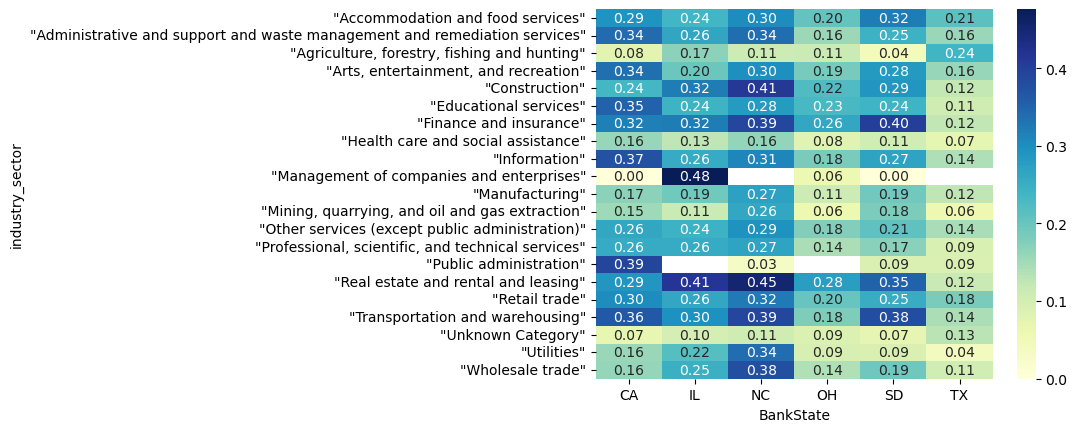

In [65]:
sn.heatmap(pivot_df, annot=True, cmap='YlGnBu', fmt='.2f')

In [ ]:
#There is no clear indicator of a indutry of defaulting 
#But among the different industries Real Estate and Leasing has considerabbly higher default rate among peer states
#Second will be Finance and insurance


In [66]:
banks_query="""
with cte as(
select distinct "Bank",count(1),
avg(case when "MIS_Status"='CHGOFF'then 1 else 0 end) as default_rate
from sbanational
group by 1
having count(1) > 10
order by 3 desc
)
select * from cte
where default_rate >0.5
"""
banks_df=sqlio.read_sql_query(banks_query,conn)

banks_df.head()

C:\Users\thoma\AppData\Local\Temp\ipykernel_4972\3905396534.py:13: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  banks_df=sqlio.read_sql_query(banks_query,conn)


,Bank,count,default_rate
0,FDIC/ALLIANCE BANK,17,1.000
1,FDIC/FIRST INTERSTATE BANK,11,1.000
2,FDIC/MONCOR BANK,19,1.000
3,FDIC/WESTERN BANK,14,1.000
4,FIRST COMMERCIAL MORTGAGE,15,1.000


In [ ]:
list_of_defaulter_banks=list(banks_df['Bank'][0:len(banks_df)-1])
list_of_defaulter_banks
#We will discard all the loan applications from this bank

In [21]:
#UPDATE your_table
#SET column_name = REPLACE(column_name, '"', '');

#The above code is used to remove "" from all fields in the industry sector column
#This Column was derived from NAICS column where last two digit represt the industry sector

industry_cohort_query="""
select
bbb.industry_sector,
date_part('year',bbb."ApprovalDate") as years,
avg(case when bbb."MIS_Status"='CHGOFF' then 1 else 0 end) as default_rate
,count(distinct "LoanNr_ChkDgt ") as number_of_loans
from
(select "industry_sector",min("ApprovalDate") as first_date
from sbanational
group by 1) as aaa
join sbanational as bbb
on aaa."industry_sector"=bbb."industry_sector"
group by 1,2
order by 1,2
"""
industry_cohort_df=sqlio.read_sql_query(industry_cohort_query,conn)
industry_cohort_df


C:\Users\thoma\AppData\Local\Temp\ipykernel_4056\1354482996.py:22: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  industry_cohort_df=sqlio.read_sql_query(industry_cohort_query,conn)


,industry_sector,years,default_rate,number_of_loans
0,Accommodation and food services,1987.0,0.583333,12
1,Accommodation and food services,1988.0,0.250000,20
2,Accommodation and food services,1989.0,0.088889,90
3,Accommodation and food services,1990.0,0.048780,82
4,Accommodation and food services,1991.0,0.031746,126
...,...,...,...,...
584,Wholesale trade,2010.0,0.104148,1133
585,Wholesale trade,2011.0,0.067114,745
586,Wholesale trade,2012.0,0.046563,451
587,Wholesale trade,2013.0,0.015957,188


In [46]:
industry_names=industry_cohort_df['industry_sector'].unique()
industry_names

array(['Accommodation and food services',
       'Administrative and support and waste management and remediation services',
       'Agriculture, forestry, fishing and hunting',
       'Arts, entertainment, and recreation', 'Construction',
       'Educational services', 'Finance and insurance',
       'Health care and social assistance', 'Information',
       'Management of companies and enterprises', 'Manufacturing',
       'Mining, quarrying, and oil and gas extraction',
       'Other services (except public administration)',
       'Professional, scientific, and technical services',
       'Public administration', 'Real estate and rental and leasing',
       'Retail trade', 'Transportation and warehousing',
       'Unknown Category', 'Utilities', 'Wholesale trade'], dtype=object)

In [44]:
def line_bar(industry):
    plt.figure(figsize=(14, 6))
    plot_df=industry_cohort_df[industry_cohort_df['industry_sector']==industry]

    plt.subplot(1,2,1)
    plt.title(f"Defualt rate in {industry}")
    sn.lineplot(data=plot_df,x="years",y="default_rate")
    
    
    plt.subplot(1,2,2)
    sn.barplot(data=plot_df,x="years", y="number_of_loans", palette='plasma')

    # Adding labels to the bars (Horizontal bar plot)
    for index, value in enumerate(plot_df["number_of_loans"]):
        plt.text(index, value, str(value), ha='center', va='bottom')

    plt.xlabel('Categories')
    plt.ylabel('Values')
    plt.xticks(rotation=60)
    plt.title(f'Number of loans by {industry}')
    plt.tight_layout()
    plt.show()

    # Adding labels to the bars
    #for index, value in enumerate(values):
      #  plt.text(value, index, str(value))
    plt.tight_layout()
    plt.show()


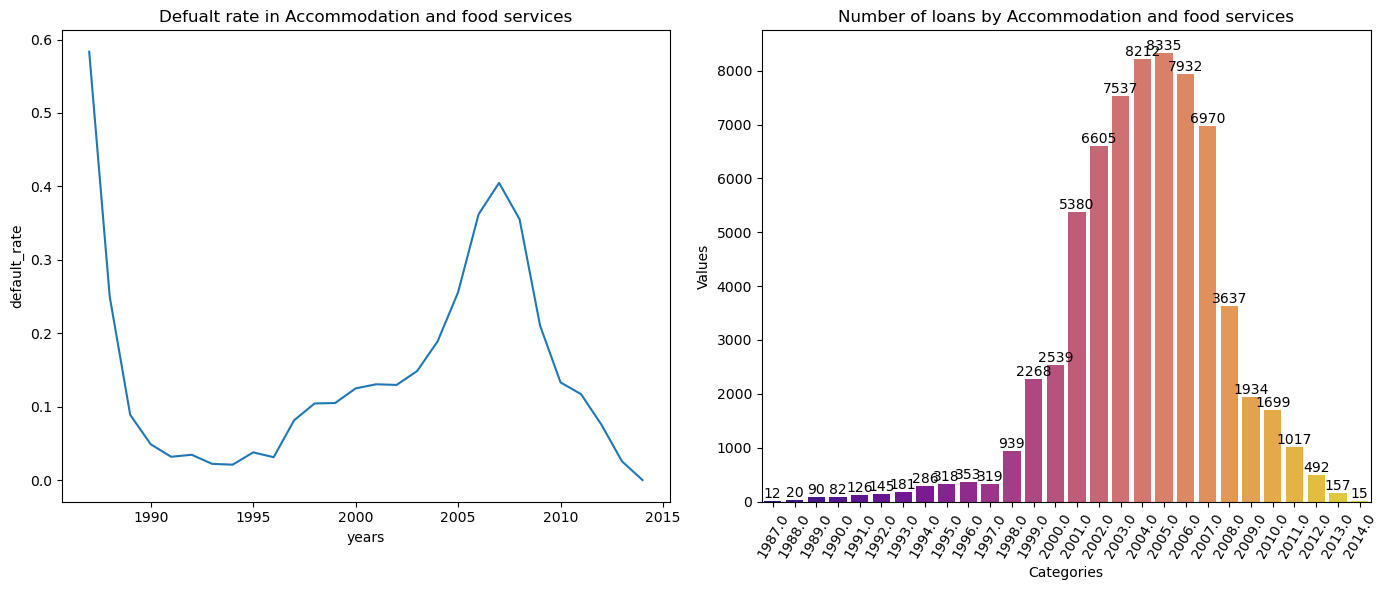

<Figure size 640x480 with 0 Axes>

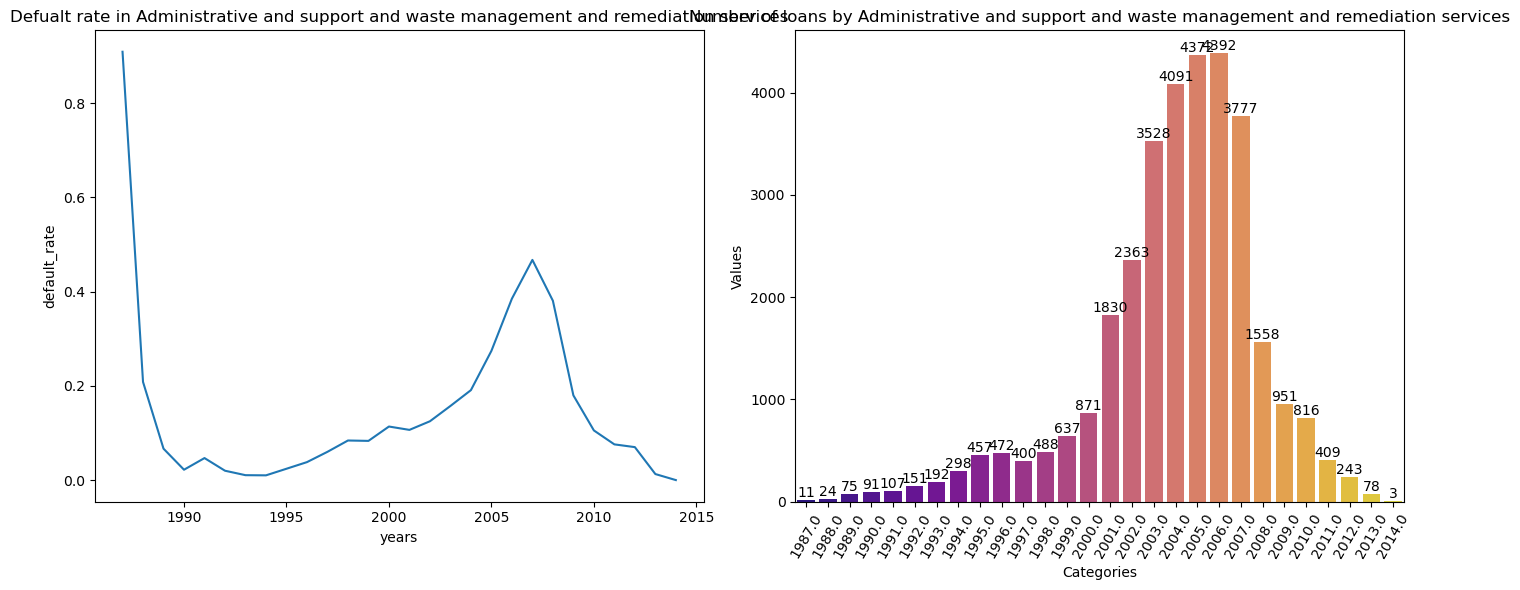

<Figure size 640x480 with 0 Axes>

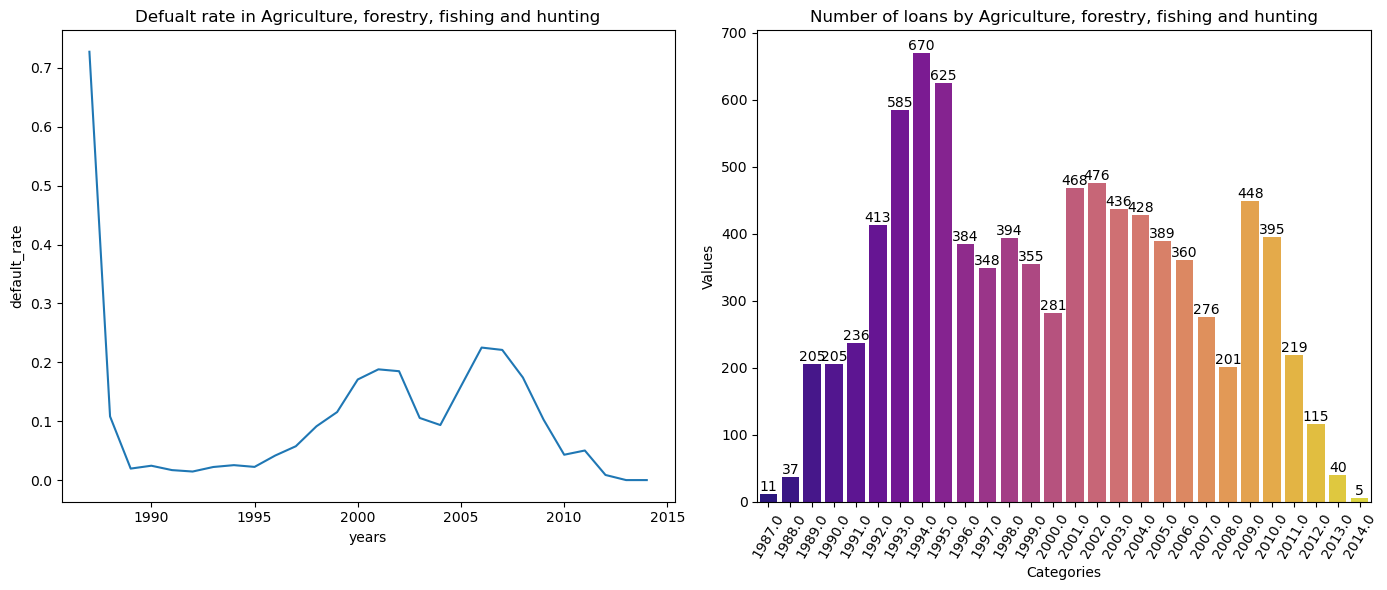

<Figure size 640x480 with 0 Axes>

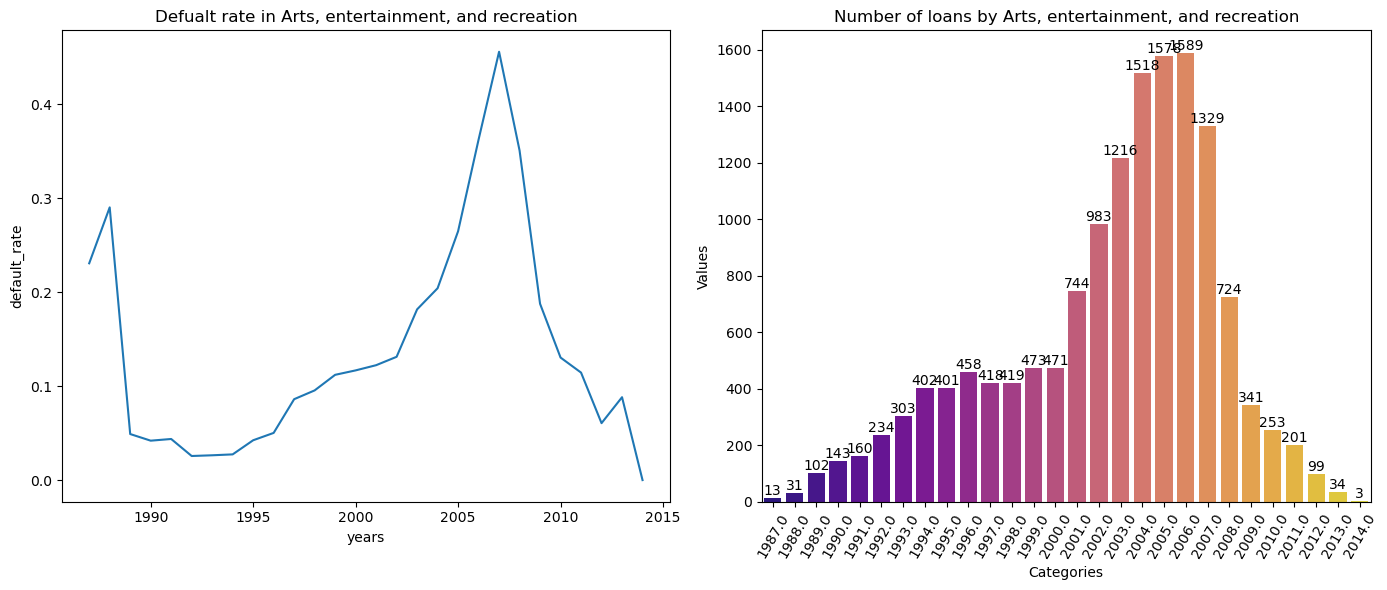

<Figure size 640x480 with 0 Axes>

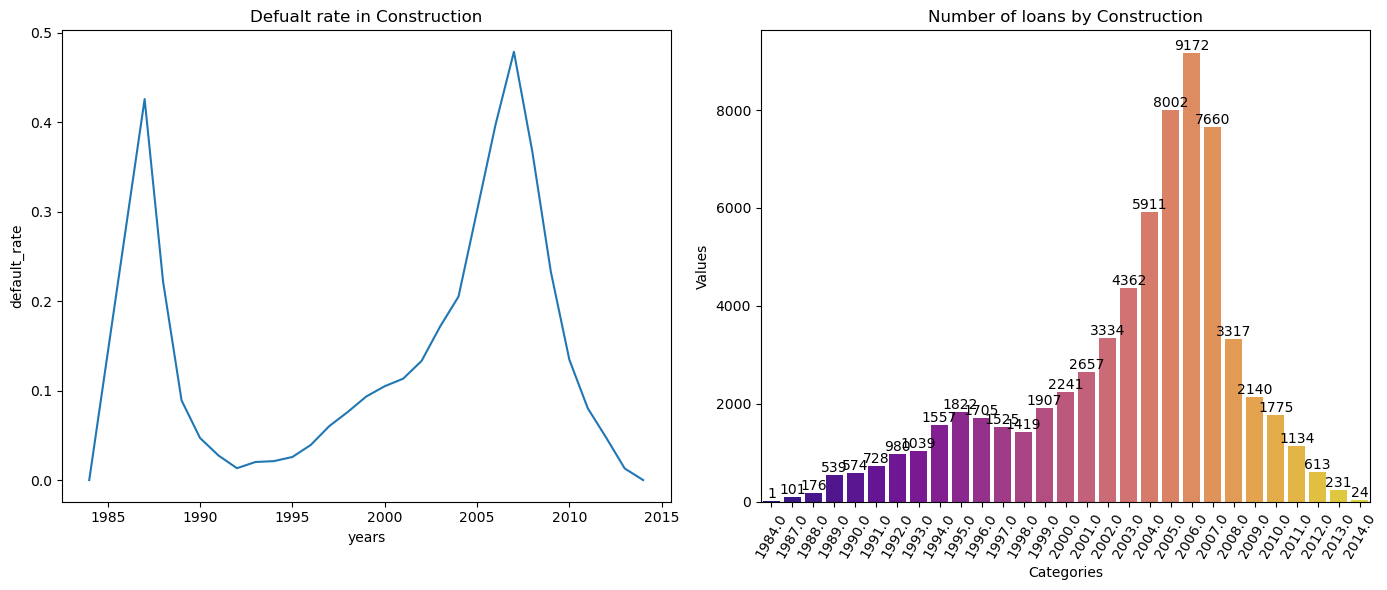

<Figure size 640x480 with 0 Axes>

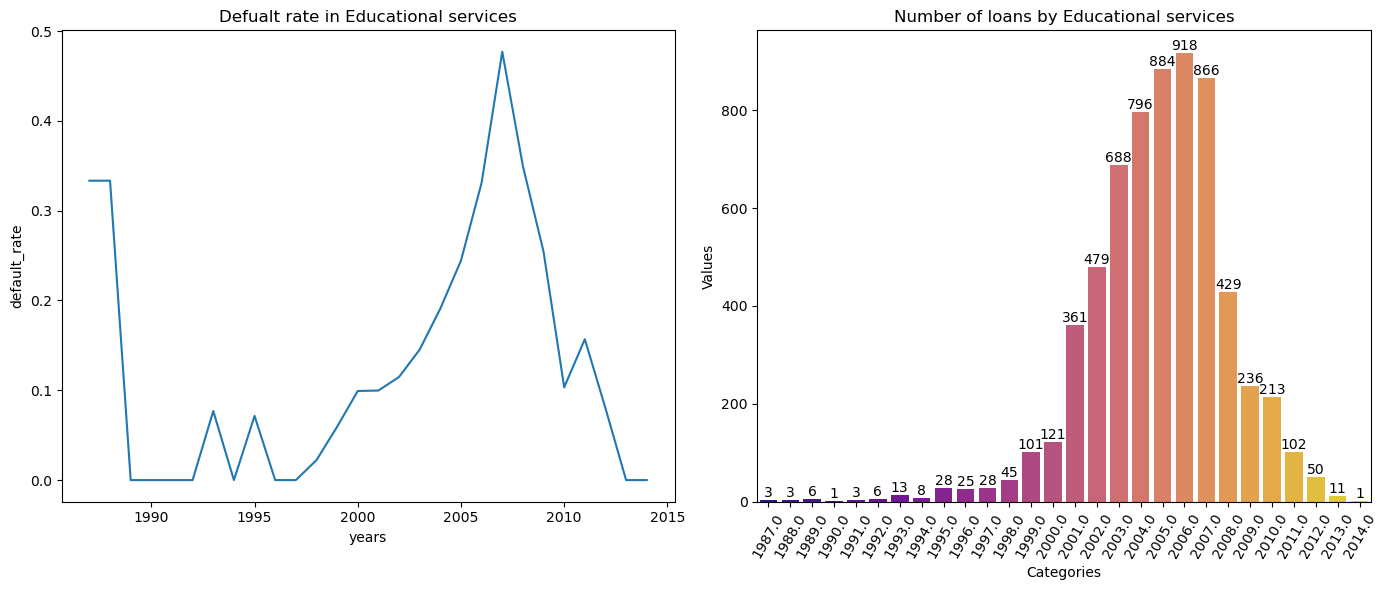

<Figure size 640x480 with 0 Axes>

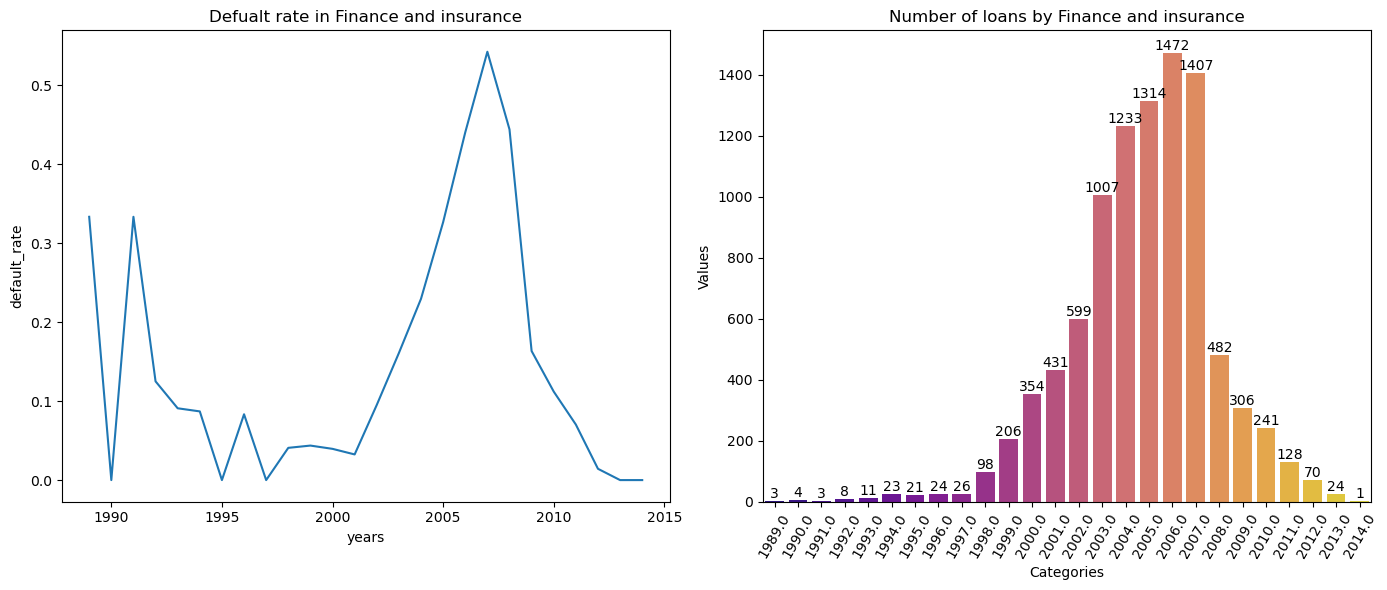

<Figure size 640x480 with 0 Axes>

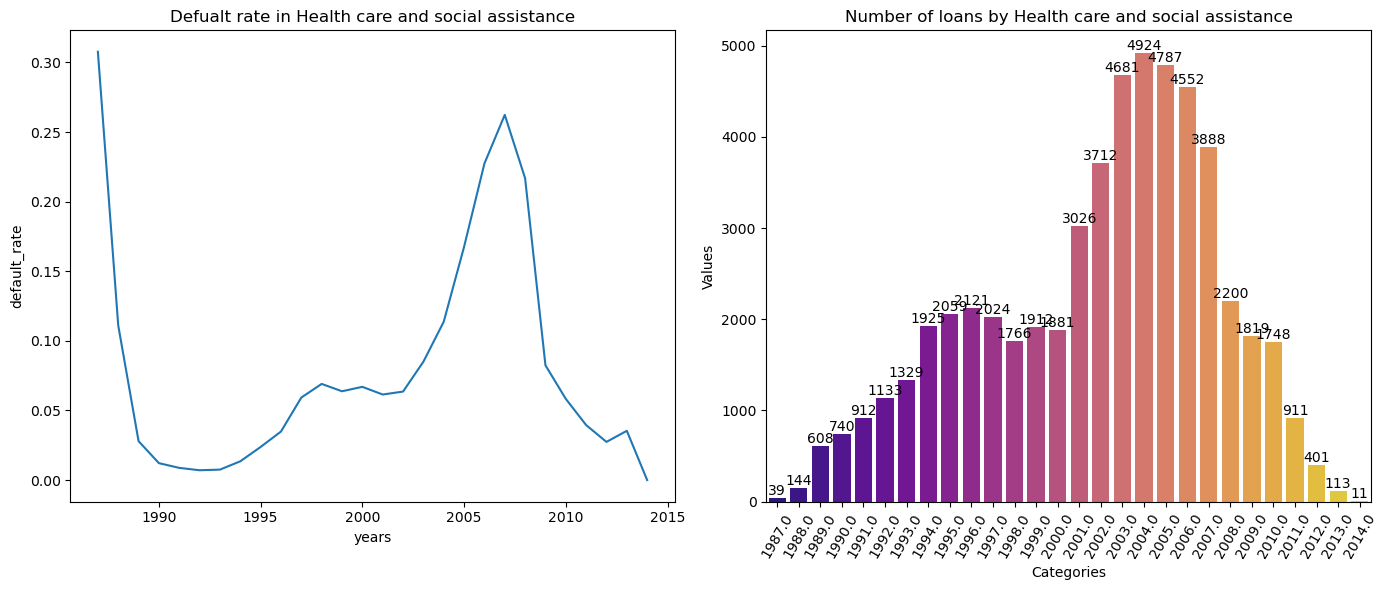

<Figure size 640x480 with 0 Axes>

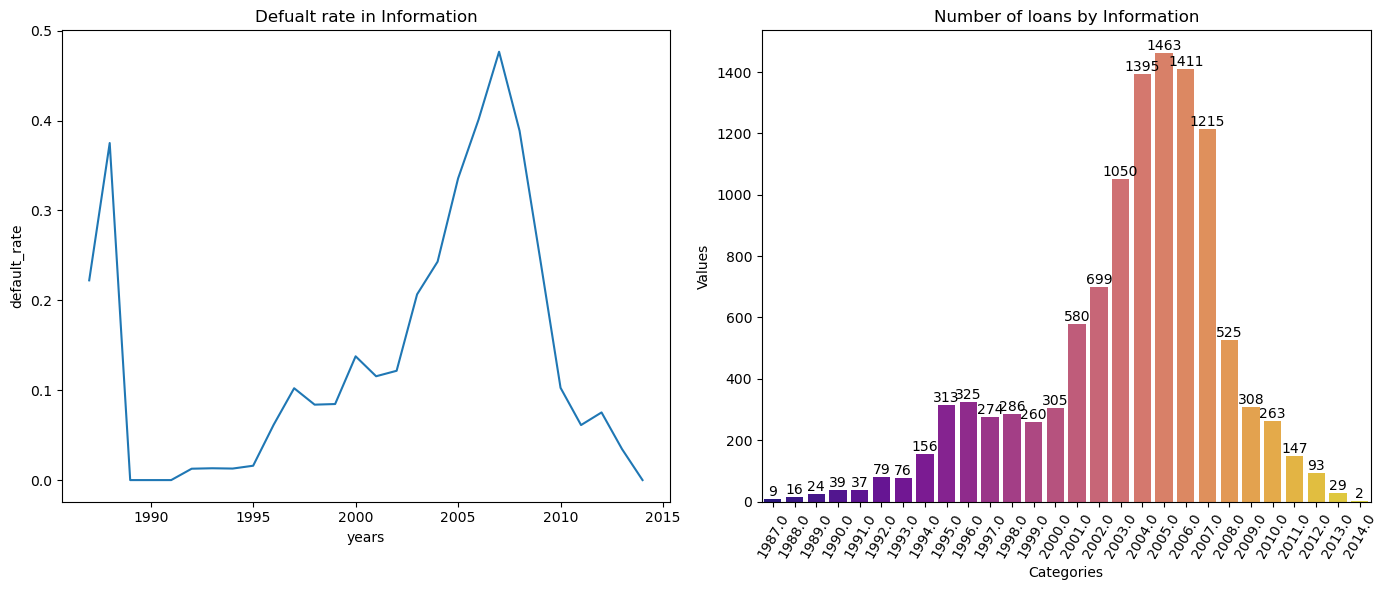

<Figure size 640x480 with 0 Axes>

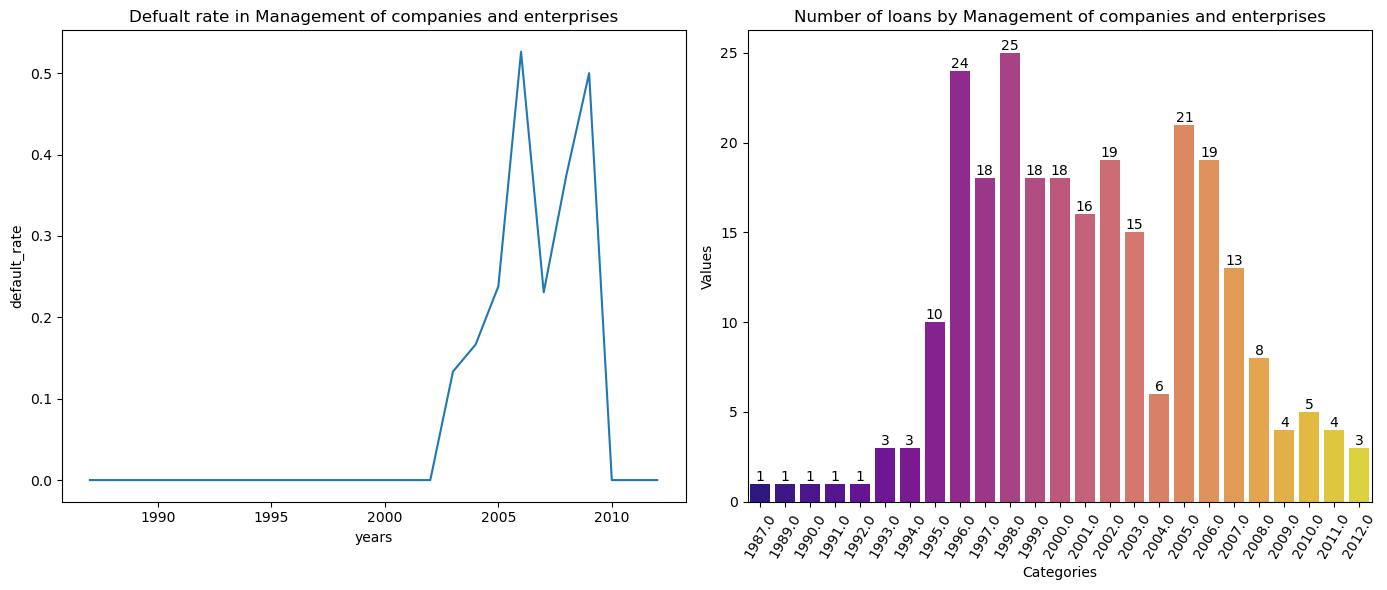

<Figure size 640x480 with 0 Axes>

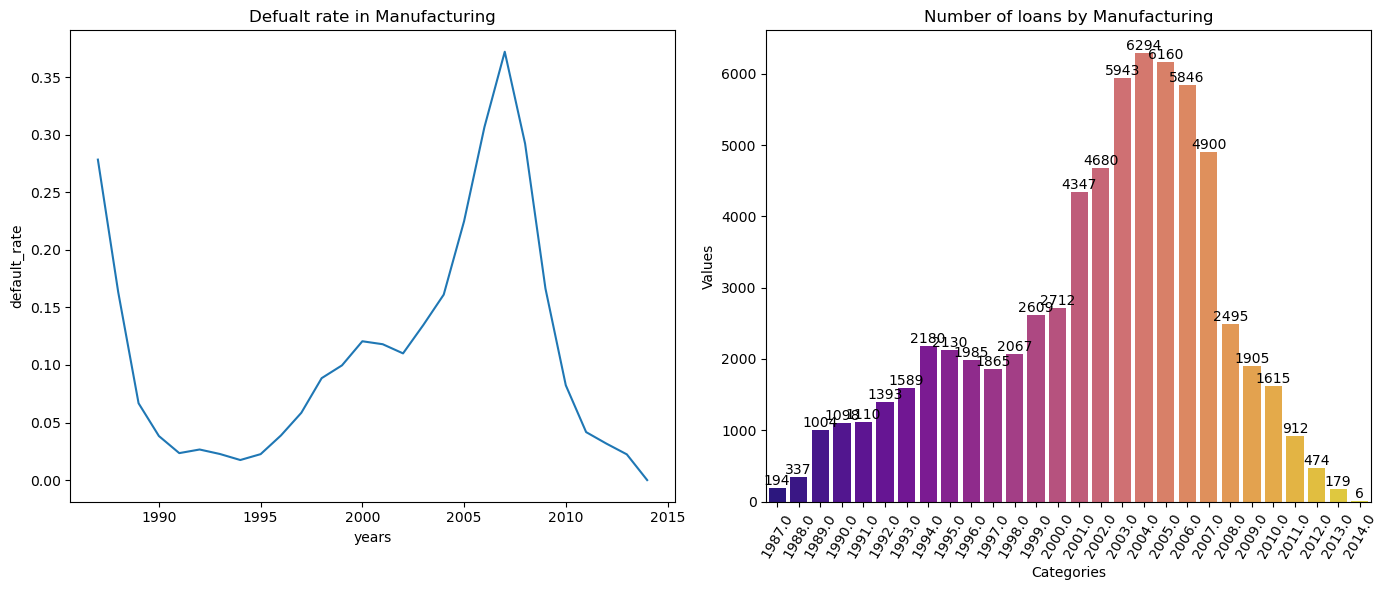

<Figure size 640x480 with 0 Axes>

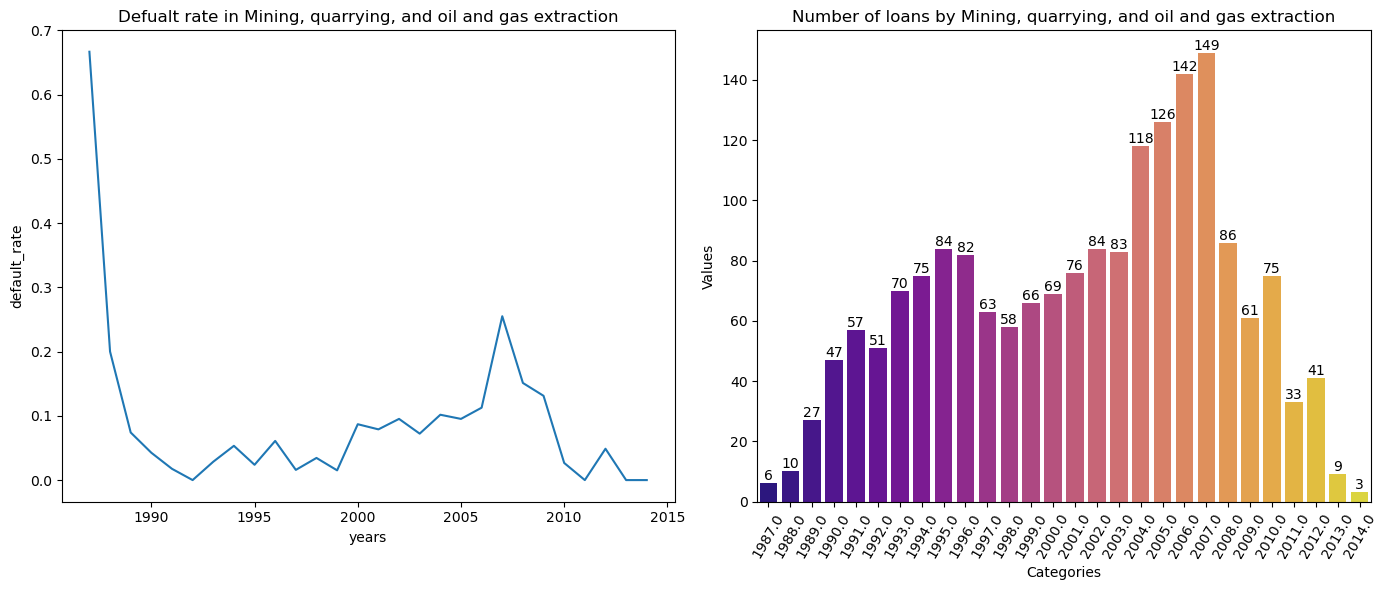

<Figure size 640x480 with 0 Axes>

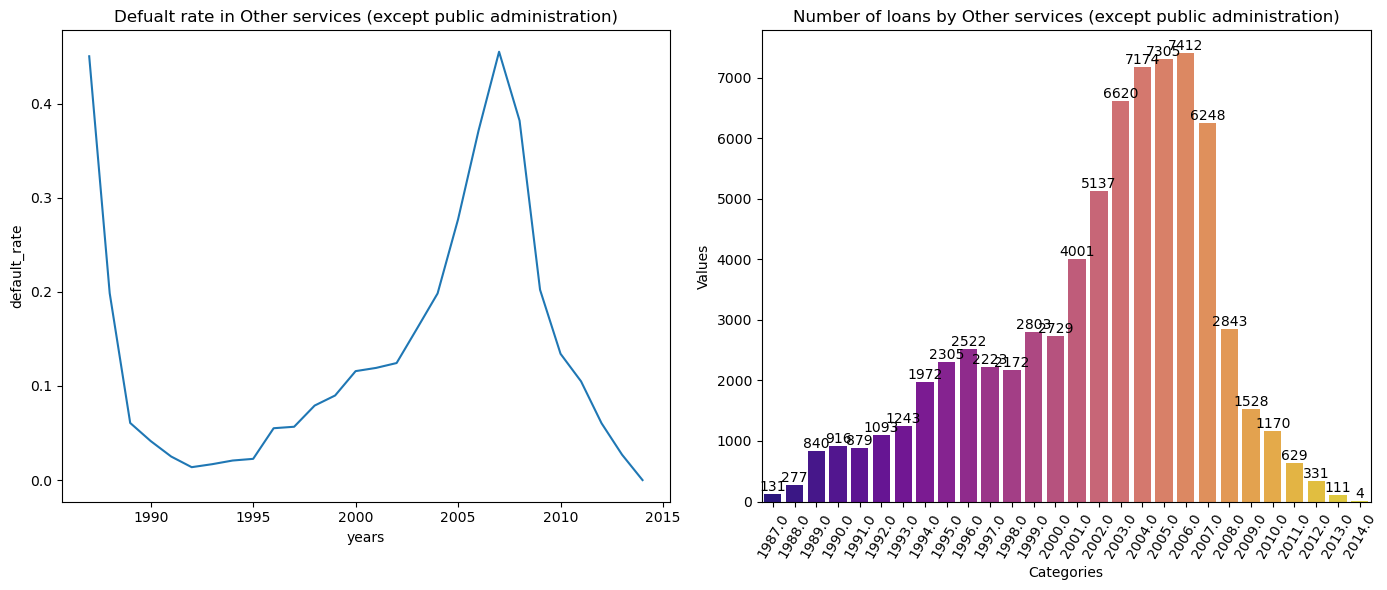

<Figure size 640x480 with 0 Axes>

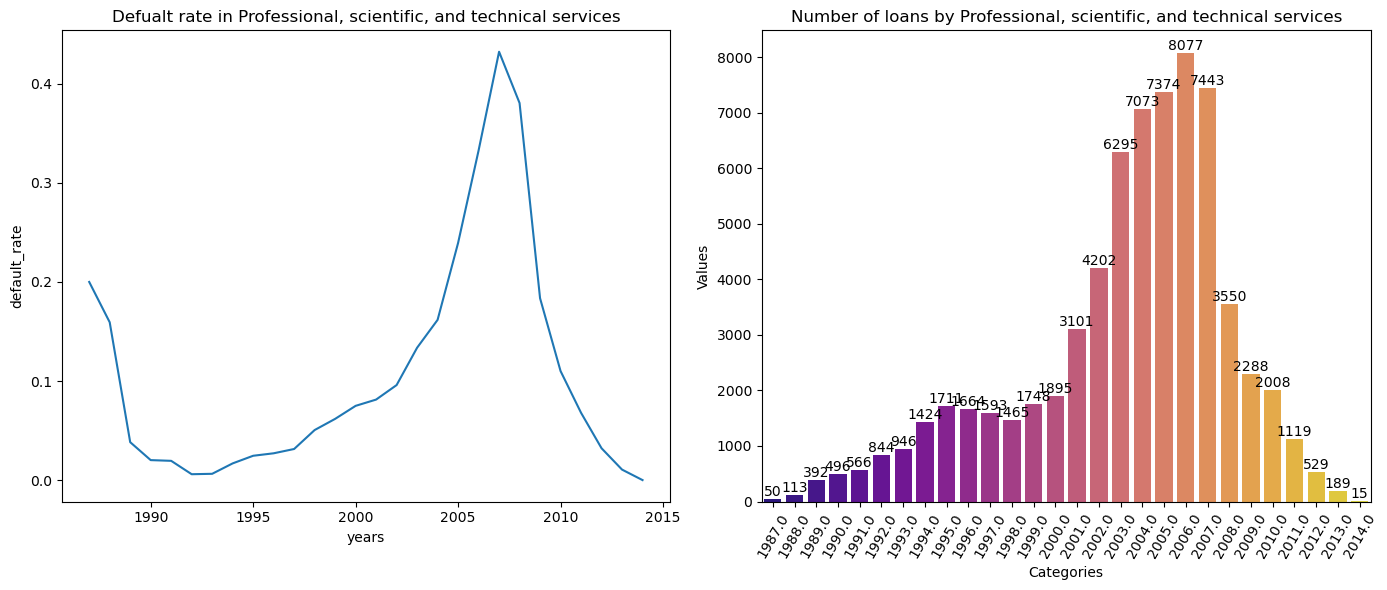

<Figure size 640x480 with 0 Axes>

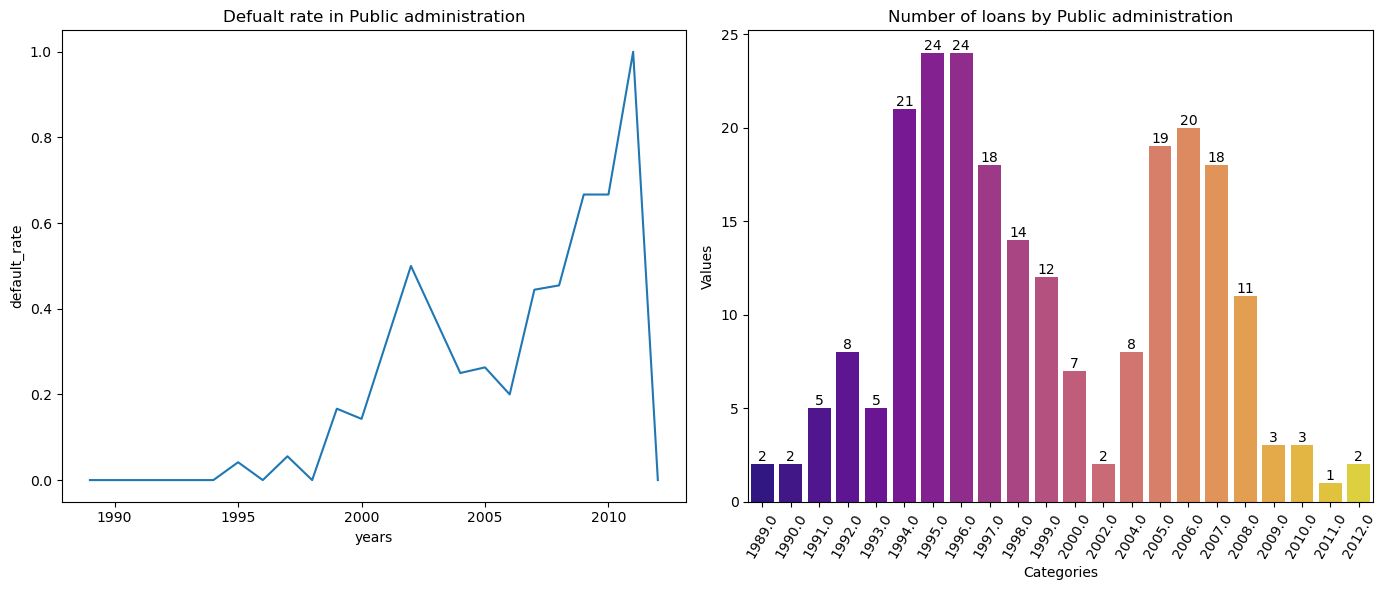

<Figure size 640x480 with 0 Axes>

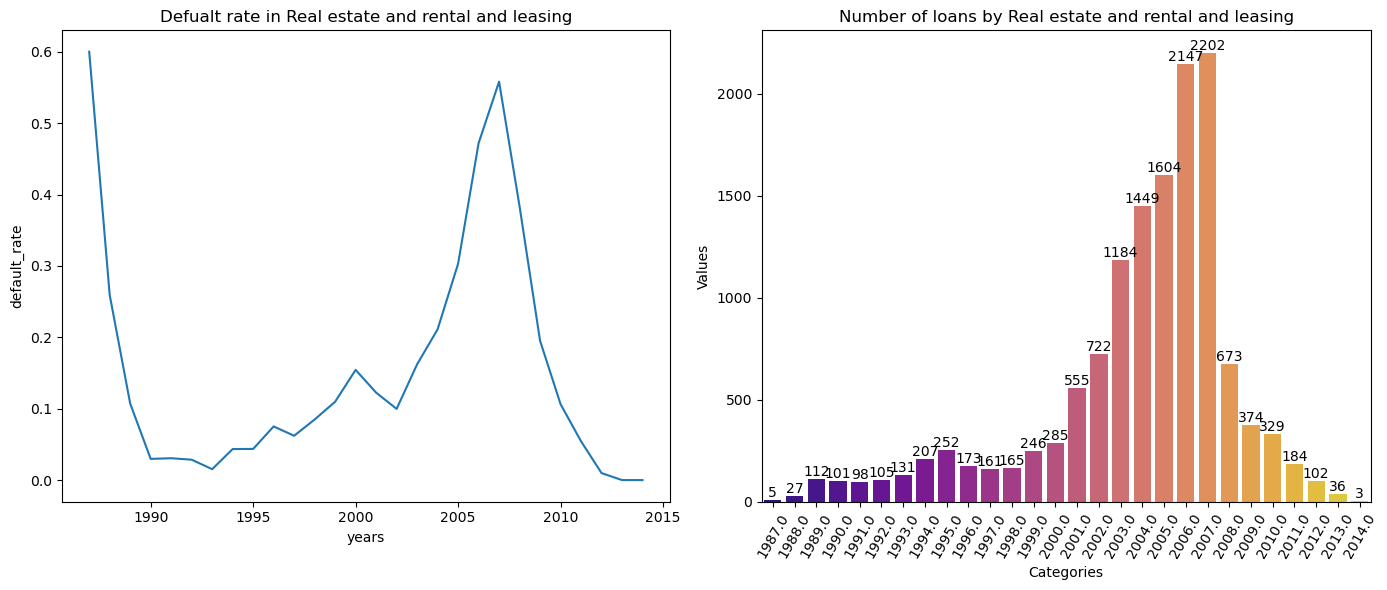

<Figure size 640x480 with 0 Axes>

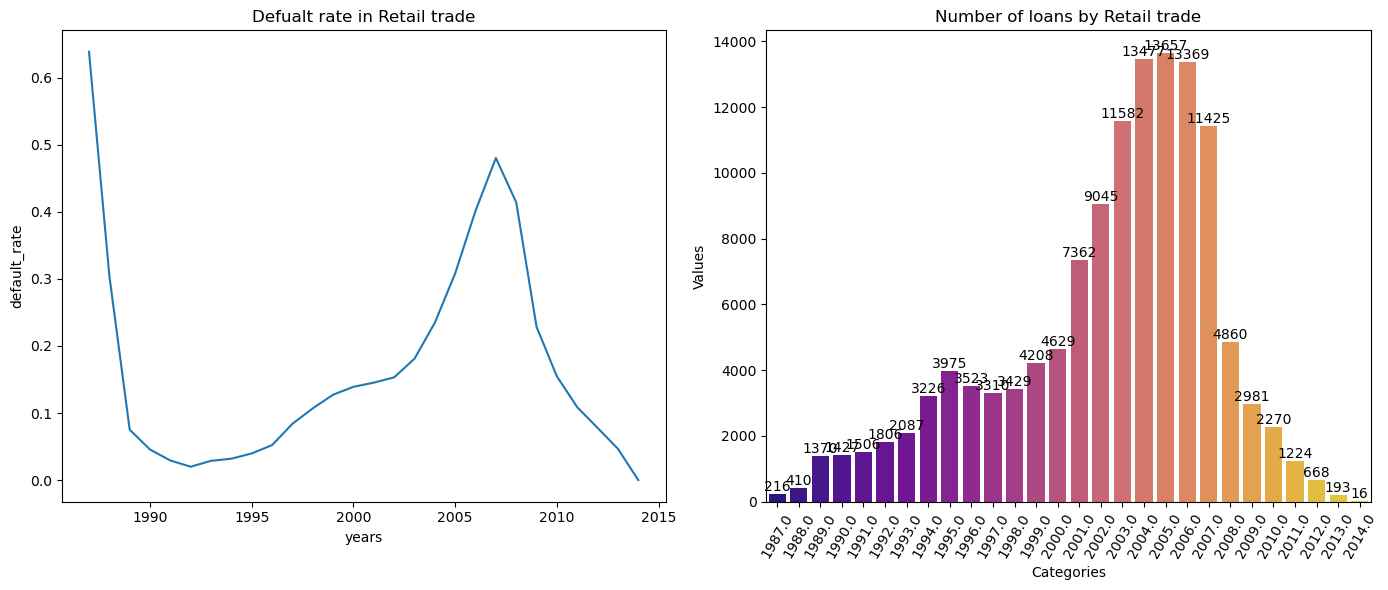

<Figure size 640x480 with 0 Axes>

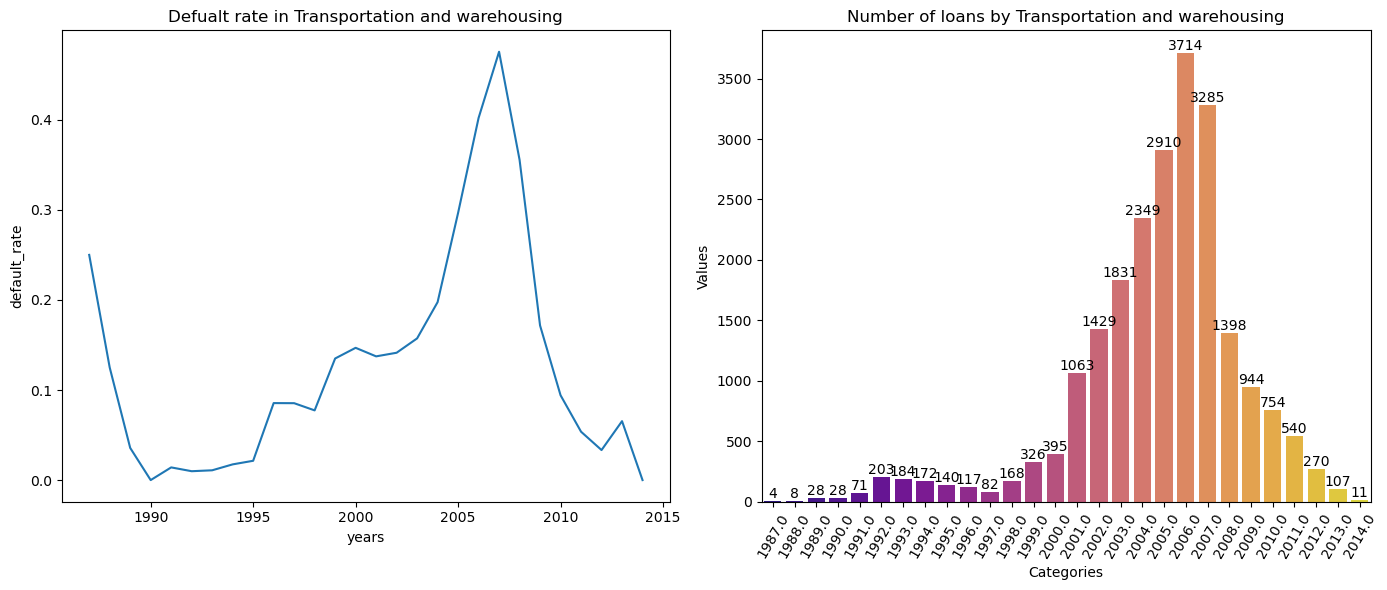

<Figure size 640x480 with 0 Axes>

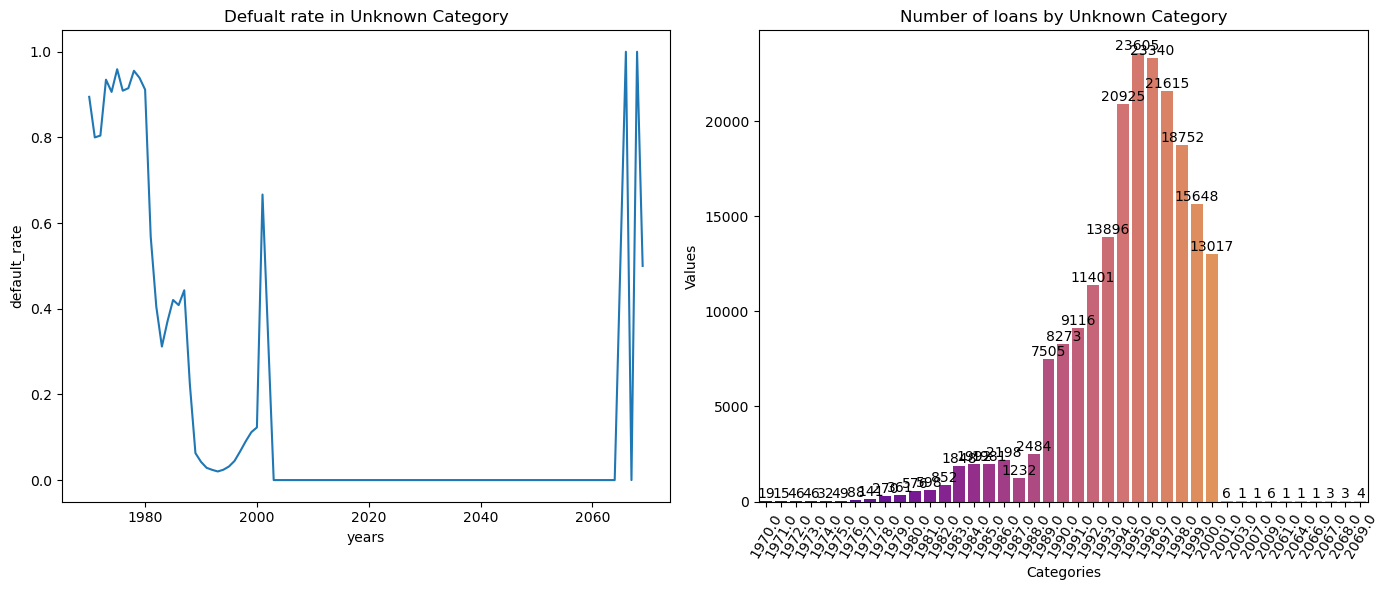

<Figure size 640x480 with 0 Axes>

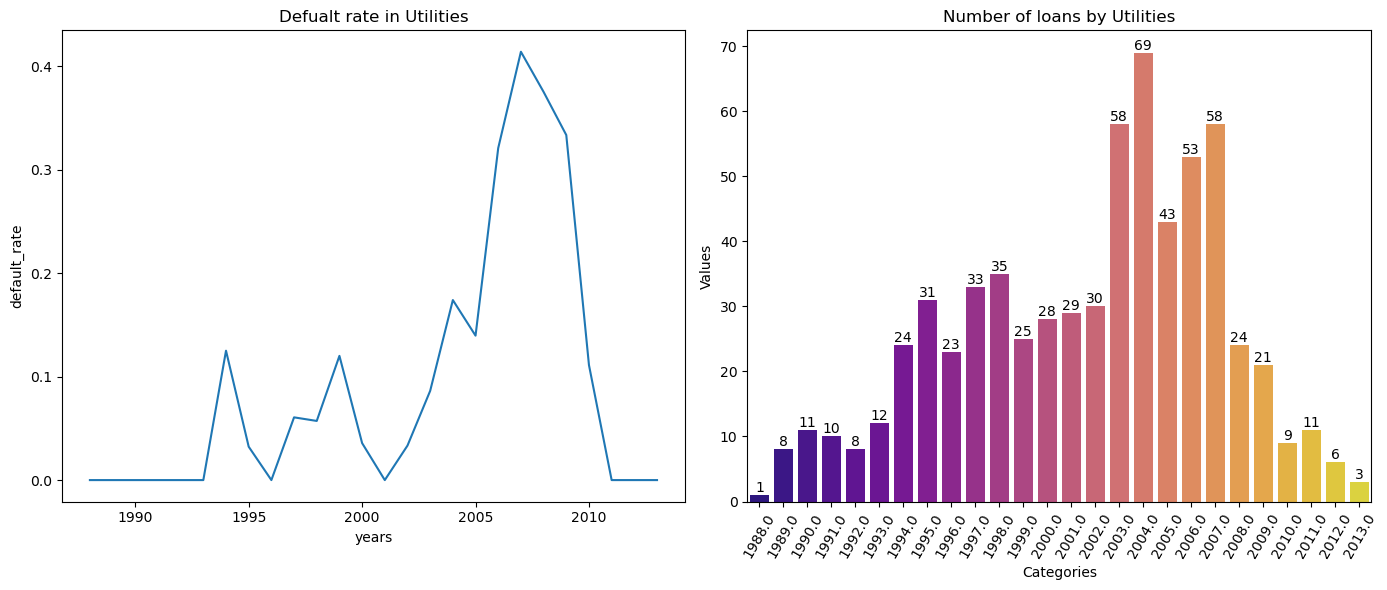

<Figure size 640x480 with 0 Axes>

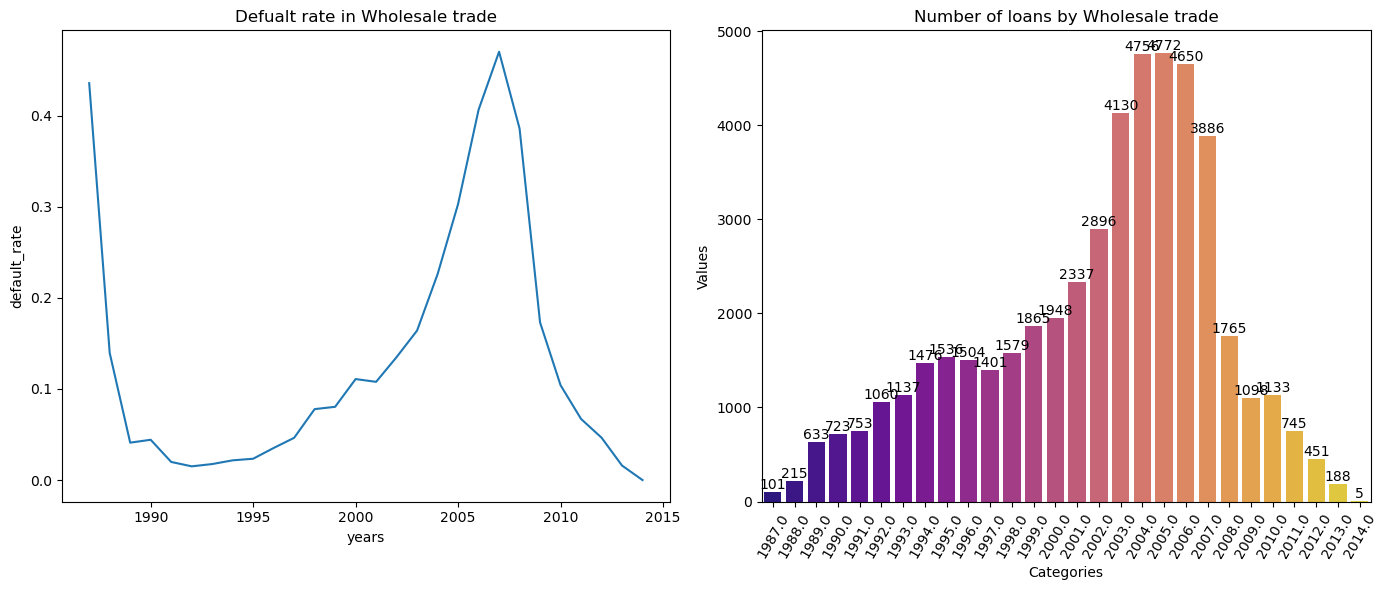

<Figure size 640x480 with 0 Axes>

In [45]:
for i in industry_names:
    line_bar(i)
    

# Decsion Criteria
Defaulter

* States:PR,VC
* Specific banks
* Gross Disbursment less than 43,62,157
* Term less than 240 months or 20 years
* Industries include  Real Estate and Leasing & Finance and insurance


These indicators will likely decrease the default rates but these are not solid indicators 
If we were to build any classification Model for classifing defaulter loans we would have considerably more siginifiacant accuracy in predicting loan applicatios that are likely to default

['FDIC/ALLIANCE BANK',
 'FDIC/FIRST INTERSTATE BANK',
 'FDIC/MONCOR BANK',
 'FDIC/WESTERN BANK',
 'FIRST COMMERCIAL MORTGAGE',
 'FDIC/ALASKA CONTINENTAL BANK',
 'UNITED WESTERN BANK',
 'CAPITAL ONE BK (USA) NATL ASSO',
 'SHOREBANK',
 'FIRSTCITY BANK',
 'SECURITY NATIONAL PARTNERS',
 'M&I, A BRANCH OF',
 'SOUTHLAND CREDIT UNION',
 'UTAH FIRST FCU',
 'SUPERIOR FINANCIAL GROUP, LLC',
 'LOGIX FCU',
 'THE LEGACY BANK, A DIVISION OF',
 'UNITED SAN ANTONIO COMMUN FCU',
 'CERTIFIED FCU',
 'FDIC/MECHANICS BANK',
 'COMM. SERVICES OF PERRY INC',
 'HARRIS N.A., A BRANCH OF',
 'FEDERAL DEPOSIT INSUR CORP',
 'DMB COMMUNITY BANK',
 'BENEFICIAL STATE BANK',
 'BUS. DEVEL CORP - GEORGIA I',
 'WAYNE COUNTY BANK',
 'BBCN BANK',
 'HORIZON UTAH FCU D/B/A HORIZON',
 'MONARCH COMMUNITY BANK',
 'BLOOMFIELD STATE BANK',
 'RBC BANK (USA)',
 'BEEHIVE CU',
 'RANDOLPH-BROOKS FCU',
 'SAFE CU']

In [ ]:
#Question :Does the decision to be taken for the first loan of a customers 
#         :OR does the decision to be taken is then cumilative count of applications where we arent seeing any sort of
#         :progress in the decreasing of default rate

#

### Adding New column named Loan_Eligibility

`ALTER TABLE sbanational`

`ADD column "Loan_Eligibility" VARCHAR(100)`



update sbanational
set Loan_Eligibility=  query

In [47]:
final_query="""
select 
---Higher Disbursement Gross indicate companys asset power to Pay back
case when "DisbursementGross" >= 4360000 then 1
---Avoiding these two Bank States cause of higher defaults
when "BankState" not in ('PR','VC') then 1 
---Including Loans against property
when real_estate=1 then 1
---Excluding Risky Industry Sectors
when industry_sector not in ('Finance and insurance','Real estate and rental and leasing')
then 1
---Selecting Banks with consistent defaults and high rate of default
when "Bank" not in ('FDIC/ALLIANCE BANK',
 'FDIC/FIRST INTERSTATE BANK',
 'FDIC/MONCOR BANK',
 'FDIC/WESTERN BANK',
 'FIRST COMMERCIAL MORTGAGE',
 'FDIC/ALASKA CONTINENTAL BANK',
 'UNITED WESTERN BANK',
 'CAPITAL ONE BK (USA) NATL ASSO',
 'SHOREBANK',
 'FIRSTCITY BANK',
 'SECURITY NATIONAL PARTNERS',
 'M&I, A BRANCH OF',
 'SOUTHLAND CREDIT UNION',
 'UTAH FIRST FCU',
 'SUPERIOR FINANCIAL GROUP, LLC',
 'LOGIX FCU',
 'THE LEGACY BANK, A DIVISION OF',
 'UNITED SAN ANTONIO COMMUN FCU',
 'CERTIFIED FCU',
 'FDIC/MECHANICS BANK',
 'COMM. SERVICES OF PERRY INC',
 'HARRIS N.A., A BRANCH OF',
 'FEDERAL DEPOSIT INSUR CORP',
 'DMB COMMUNITY BANK',
 'BENEFICIAL STATE BANK',
 'BUS. DEVEL CORP - GEORGIA I',
 'WAYNE COUNTY BANK',
 'BBCN BANK',
 'HORIZON UTAH FCU D/B/A HORIZON',
 'MONARCH COMMUNITY BANK',
 'BLOOMFIELD STATE BANK',
 'RBC BANK (USA)',
 'BEEHIVE CU',
 'RANDOLPH-BROOKS FCU',
 'SAFE CU') 
then 1

else 0
end
as approved
from sbanational

"""

In [48]:
# resulting_df=sqlio.read_sql_query(final_query,conn)
#Note Running the finallquery marks only 11 from 899153 as chances of default
